In [2]:
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=2)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 597, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 597 (delta 10), reused 2 (delta 1), pack-reused 569
Receiving objects: 100% (597/597), 57.73 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (298/298), done.
/content/nlp-with-transformers
⏳ Installing base requirements ...
✅ Base requirements installed!
Using transformers v4.30.2
Using datasets v2.13.1
Using accelerate v0.20.3
Using sentencepiece v0.1.99
Using umap v0.5.3
No GPU was detected! This notebook can be *very* slow without a GPU 🐢
Go to Runtime > Change runtime type and select a GPU hardware accelerator.


텍스트 분류는 NLP에서 매우 일반적인 작업이다.  
감성 분석 또한 이의 일부이며 매우 유용한다.  

</br>
이 장에서는 BERT의 한 종류인 DistilBERT를 사용해 구현해보겠다.  

</br>
또한 허깅페이스의 핵심 라이브러리인 데이터셋, 토크나이저, 트랜스포머를 사용해 보겠다.


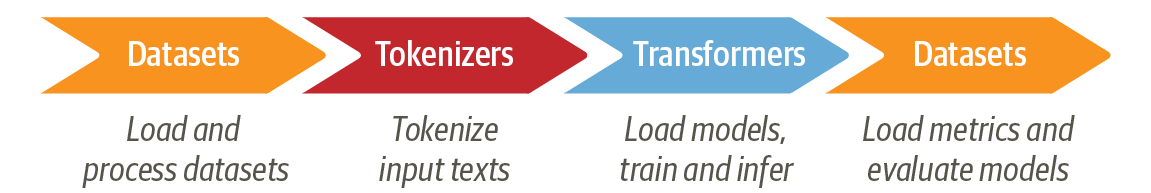

---
# 데이터 셋
긍정적과 부정적으로 나뉘는 대부분의 감정 분석과는 달리  
이번에 사용할 데이터 셋은 분노, 혐오, 두려움, 기쁨, 슬픔, 놀람  
6개의 감정을 사용하는 데이터 셋을 사용한다.  



In [3]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 있다.")
print(f"처음 10개 데이터 셋 : {all_datasets[:10]}")

<ipython-input-3-5c4ff1dcd749>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


현재 허브에는 46122개의 데이터셋이 있다.
처음 10개 데이터 셋 : ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa',
'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
'ajgt_twitter_ar', 'allegro_reviews']


데이터셋마다 이름이 있다. load_dataset()함수로 emotion 데이터 셋을 로드해보자

In [4]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

이 emotions라는 객체는 파이썬 딕셔너리와 비슷한다.  
각 키는 다른 분할에 상응하며 일반적인 딕셔너리 사용법을 사용할 수 있다.